# Naive_Bayes--Salary_Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('SalaryData_Train.csv')
test=pd.read_csv('SalaryData_Test.csv')
df=pd.merge(train,test)
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
5,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
6,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
7,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
8,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
9,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


In [3]:
df.shape

(5910, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5910 non-null   int64 
 1   workclass      5910 non-null   object
 2   education      5910 non-null   object
 3   educationno    5910 non-null   int64 
 4   maritalstatus  5910 non-null   object
 5   occupation     5910 non-null   object
 6   relationship   5910 non-null   object
 7   race           5910 non-null   object
 8   sex            5910 non-null   object
 9   capitalgain    5910 non-null   int64 
 10  capitalloss    5910 non-null   int64 
 11  hoursperweek   5910 non-null   int64 
 12  native         5910 non-null   object
 13  Salary         5910 non-null   object
dtypes: int64(5), object(9)
memory usage: 692.6+ KB


In [5]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,32.815059,9.774450,49.204738,2.436548,38.545516
std,10.892922,1.675096,1433.023789,71.195428,7.456800
min,17.000000,1.000000,0.000000,0.000000,8.000000
25%,23.000000,9.000000,0.000000,0.000000,40.000000
50%,32.000000,9.000000,0.000000,0.000000,40.000000
75%,40.000000,10.000000,0.000000,0.000000,40.000000
max,67.000000,16.000000,99999.000000,2415.000000,85.000000


In [6]:
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1])
df.iloc[:,2]=labelencoder.fit_transform(df.iloc[:,2])
df.iloc[:,4]=labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5]=labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6]=labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7]=labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,8]=labelencoder.fit_transform(df.iloc[:,8])
df.iloc[:,12]=labelencoder.fit_transform(df.iloc[:,12])
df.iloc[:,13]=labelencoder.fit_transform(df.iloc[:,13])
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,2,11,9,0,4,1,2,1,0,0,40,3,0
1,19,2,11,9,2,1,3,2,1,0,0,40,3,0
2,19,2,11,9,2,1,3,2,1,0,0,40,3,0
3,19,2,11,9,2,1,3,2,1,0,0,40,3,0
4,19,2,11,9,2,1,3,2,1,0,0,40,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,61,2,5,4,1,1,0,2,1,0,0,40,3,0
5906,45,3,9,13,1,2,0,2,1,0,0,45,3,1
5907,32,2,15,10,2,2,3,2,1,0,0,40,3,0
5908,33,2,11,9,0,0,4,1,0,0,0,40,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            5910 non-null   int64
 1   workclass      5910 non-null   int32
 2   education      5910 non-null   int32
 3   educationno    5910 non-null   int64
 4   maritalstatus  5910 non-null   int32
 5   occupation     5910 non-null   int32
 6   relationship   5910 non-null   int32
 7   race           5910 non-null   int32
 8   sex            5910 non-null   int32
 9   capitalgain    5910 non-null   int64
 10  capitalloss    5910 non-null   int64
 11  hoursperweek   5910 non-null   int64
 12  native         5910 non-null   int32
 13  Salary         5910 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 484.8 KB


In [8]:
df['Salary'].value_counts()

0    4909
1    1001
Name: Salary, dtype: int64

In [9]:
def minmax_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)

In [10]:
df=minmax_func(df.iloc[:,0:])
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,20.746269,2.0,11.0,7.9375,0.0,4.0,1.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
1,1.746269,2.0,11.0,7.9375,2.0,1.0,3.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
2,1.746269,2.0,11.0,7.9375,2.0,1.0,3.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
3,1.746269,2.0,11.0,7.9375,2.0,1.0,3.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
4,1.746269,2.0,11.0,7.9375,2.0,1.0,3.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,43.746269,2.0,5.0,2.9375,1.0,1.0,0.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
5906,27.746269,3.0,9.0,11.9375,1.0,2.0,0.0,2.0,1.0,0.0,0.0,36.905882,3.0,1.0
5907,14.746269,2.0,15.0,8.9375,2.0,2.0,3.0,2.0,1.0,0.0,0.0,31.905882,3.0,0.0
5908,15.746269,2.0,11.0,7.9375,0.0,0.0,4.0,1.0,0.0,0.0,0.0,31.905882,3.0,0.0


In [11]:
x=df.iloc[:,0:13]
y=df.iloc[:,13]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [16]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [17]:
pred_gnb=nb.fit(x_train,y_train).predict(x_test)


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_gnb)

array([[1212,   12],
       [ 237,   17]], dtype=int64)

In [19]:
np.mean(pred_gnb==y_test.values)

0.8315290933694182

[[1212   12]
 [ 237   17]]


<AxesSubplot:>

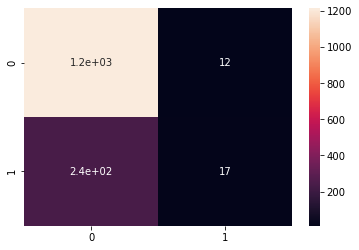

In [20]:
import seaborn as sns
cm=confusion_matrix(y_test,pred_gnb)
print(cm)
sns.heatmap(cm,annot=True)